<a href="https://colab.research.google.com/github/Luiz-Octavioo/Curso-de-Python-para-Estudos-Climaticos/blob/main/Xarray_para_estudos_climaticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <img src=https://repository-images.githubusercontent.com/13221727/f43c8900-75c0-11ea-9e1b-66b0af0689e0 width=45% height=125%> <center>

---------------------------------------------
    
O pacote **Xarray** é um pacote focado em manipulação de dados n-dimensionais em pontos de
grade com formatos do tipo netcdf, grib e até mesmo geotiff;
    

1.Não apenas é essencial, como a base de um ecossistema maior de pacotes com aplicações de
meteorologia chamado Pangeo.


2.O Xarray incorpora muitas funcionalidades do NumPy e Pandas para dados descritos em pontos
de grade, de maneira que a sintaxe é bastante familiar para quem conhece esses dois pacotes.


3.Pela convenção, o Xarray é importado como xr:

In [ ]:
import xarray as xr

## Abrindo um banco de dados em formato `NETCDF`

In [ ]:
ds = xr.open_dataset('precip.2021.nc')
#.open_dataset('precip.2021.nc') # Local
# ds = xr.open_dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/cpc_global_precip/precip.1979.nc') # Via OpenDAP

In [ ]:
# Verificar as informaçoes presentes no banco de dados
ds

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 365)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-12-31
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    version:        V1.0
    title:          CPC GLOBAL PRCP V1.0 RT
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globalprec...
    dataset_title:  CPC GLOBAL PRCP V1.0
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/CPC_UNI_PRCP/
    history:        Updated 2022-01-02 23:30:58

## Acessar uma variavel

Para acessar uma variavel no xarray a maneira é similar ao que utilizamos no Pandas

In [ ]:
ds['precip']

<xarray.DataArray 'precip' (time: 365, lat: 360, lon: 720)>
[94608000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-12-31
Attributes:
    units:         mm
    var_desc:      Precipitation
    level_desc:    Surface
    statistic:     Total
    parent_stat:   Other
    long_name:     Daily total of precipitation
    cell_methods:  time: sum
    valid_range:   [   0. 1000.]
    avg_period:    0000-00-01 00:00:00
    actual_range:  [  0.   776.75]
    dataset:       CPC Global Precipitation

In [ ]:
# Ou
ds.precip

<xarray.DataArray 'precip' (time: 365, lat: 360, lon: 720)>
[94608000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-12-31
Attributes:
    units:         mm
    var_desc:      Precipitation
    level_desc:    Surface
    statistic:     Total
    parent_stat:   Other
    long_name:     Daily total of precipitation
    cell_methods:  time: sum
    valid_range:   [   0. 1000.]
    avg_period:    0000-00-01 00:00:00
    actual_range:  [  0.   776.75]
    dataset:       CPC Global Precipitation

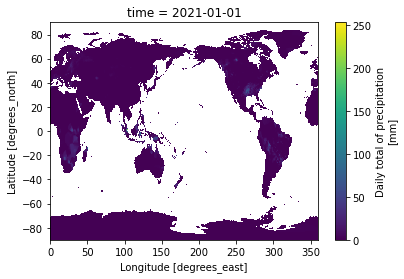

In [ ]:
# Plotar o dado
ds['precip'][0, :, :].plot()

In [ ]:
## Verificar dimensões do arquivo
ds.dims

Frozen({'lat': 360, 'lon': 720, 'time': 365})

In [ ]:
## Verificar atributos do arquivo
ds.attrs

{'Conventions': 'CF-1.0',
 'version': 'V1.0',
 'title': 'CPC GLOBAL PRCP V1.0 RT',
 'References': 'https://www.psl.noaa.gov/data/gridded/data.cpc.globalprecip.html',
 'dataset_title': 'CPC GLOBAL PRCP V1.0',
 'Source': 'ftp://ftp.cpc.ncep.noaa.gov/precip/CPC_UNI_PRCP/',
 'history': 'Updated 2022-01-02 23:30:58'}

## Slice

Na maior parte das vezes você não quer trabalhar com os dados no globo todo, mas sim
com alguma região específica de interesse. O Xarray permite selecionar o tempo e a área
através da função **`.sel()`**, mas é importante que você saiba exatamente como as variáveis
e coordenadas estão descritas no seu arquivo.

• Vamos utilizar a função **`.sel()`** em conjunto com a função **`slice()`** para recortar o globo na área do Estado do Amazonas (2N-10S, 72W-56W) no período de 2021



**Exemplo:**

In [ ]:
ds_recorte = ds.sel(lat=slice(2, -10), lon=slice(360-72, 360-56)) # time 
# ds_recorte = ds.sel(lat=slice(12, -60), lon=slice(275, 330), time=slice('2021-04-01', '2021-07-30')) # time 

In [ ]:
# Verificando as informações do dataset recortado
ds_recorte

<xarray.Dataset>
Dimensions:  (lat: 24, lon: 32, time: 365)
Coordinates:
  * lat      (lat) float32 1.75 1.25 0.75 0.25 -0.25 ... -8.25 -8.75 -9.25 -9.75
  * lon      (lon) float32 288.2 288.8 289.2 289.8 ... 302.2 302.8 303.2 303.8
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-12-31
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    version:        V1.0
    title:          CPC GLOBAL PRCP V1.0 RT
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globalprec...
    dataset_title:  CPC GLOBAL PRCP V1.0
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/CPC_UNI_PRCP/
    history:        Updated 2022-01-02 23:30:58

## Cálculos Climáticos Básicos


• O Xarray adapta uma função muito útil do Pandas chamada .groupby() que permite, com
o nome diz, agrupar as variáveis de acordo com uma coordenada e fazer alguns cálculos
estatísticos básicos em cada ponto de grade, como média aritmética e desvio padrão.



• Vamos começar calculando a média mensal da Precipitação durante o ano 2021, usando o **`.groupby()`** para agrupar os dados de acordo
com cada mês (time.month) e fazer o cálculo ao final.

In [ ]:
# ds_mensal = ds_recorte.groupby('time.month').sum(dim='time')
ds_mensal = ds_recorte.groupby('time.month').sum(dim='time')

In [ ]:
ds_mensal

<xarray.Dataset>
Dimensions:  (lat: 24, lon: 32, month: 12)
Coordinates:
  * lat      (lat) float32 1.75 1.25 0.75 0.25 -0.25 ... -8.25 -8.75 -9.25 -9.75
  * lon      (lon) float32 288.2 288.8 289.2 289.8 ... 302.2 302.8 303.2 303.8
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    precip   (month, lat, lon) float32 119.7 204.2 315.1 ... 340.5 260.1 318.2

In [ ]:
# verificar o valor de precipitacao mensal
ds_mensal.precip.sel(month=6)

<xarray.DataArray 'precip' (lat: 24, lon: 32)>
array([[312.3434   , 331.53473  , 329.1306   , 328.32022  , 328.294    ,
        329.3318   , 332.66602  , 338.55     , 350.56265  , 367.86514  ,
        375.29666  , 365.03427  , 359.35706  , 365.95956  , 376.26343  ,
        361.64206  , 290.3844   , 306.97415  , 303.6868   , 300.57678  ,
        298.8958   , 302.0167   , 290.3124   , 283.29947  , 287.08267  ,
        305.7303   , 311.4649   , 284.08185  , 262.8417   , 246.67383  ,
        234.44923  , 238.17865  ],
       [264.7066   , 307.78775  , 315.3731   , 316.6997   , 317.49792  ,
        318.71805  , 321.45462  , 327.14148  , 341.2638   , 369.22464  ,
        384.11212  , 360.49692  , 345.55908  , 352.32135  , 369.44666  ,
        337.41742  , 295.34766  , 324.18826  , 335.7238   , 324.134    ,
        312.4029   , 304.91827  , 308.15784  , 320.58093  , 333.78842  ,
        343.93585  , 348.28702  , 340.8604   , 276.08817  , 247.67442  ,
        232.0288   , 235.49126  ],
       [241.94484  , 265.2375   , 288.3858   , 296.28223  , 299.69525  ,
        301.70084  , 303.89667  , 307.69736  , 315.16034  , 331.55133  ,
        341.51746  , 328.754    , 320.0019   , 322.13318  , 338.6027   ,
        302.819    , 313.16266  , 346.67294  , 394.6873   , 411.0134   ,
        400.27     , 374.751    , 350.00253  , 352.0794   , 361.6707   ,
        358.3598   , 345.42575  , 313.15906  , 254.31815  , 236.68593  ,
...
         50.59224  ,  20.557312 ,  10.828877 ,  21.248304 ,  28.407066 ,
         25.195475 ,  25.503853 ,  26.253153 ,  24.560282 ,  21.509096 ,
         22.29302  ,  10.967416 ,   9.06134  ,  23.446405 ,  28.899338 ,
         27.599802 ,  23.449026 ,   4.813981 ,   4.2732034,   5.003489 ,
          5.9040546,   8.627263 ,  12.553049 ,  12.63228  ,  14.677685 ,
         22.830853 ,  19.707739 ],
       [ 30.831236 ,  33.990597 ,  31.769327 ,  22.627226 ,  22.566797 ,
         36.195923 ,  13.107628 ,   7.690454 ,  15.33277  ,  21.02067  ,
         19.83449  ,  23.034054 ,  27.784595 ,  25.692873 ,  26.117113 ,
         35.337635 ,  19.660242 ,   9.255304 ,  12.655027 ,  12.022272 ,
         11.476098 ,   7.705654 ,   3.7714686,   4.477211 ,   4.2650642,
          4.1237426,   4.921518 ,  11.872682 ,  15.761472 ,  21.878363 ,
         22.524597 ,   8.256224 ],
       [ 38.545063 ,  25.034634 ,  17.164865 ,  14.13235  ,  16.81789  ,
         28.176126 ,  30.343172 ,  20.115414 ,  11.993043 ,  13.252035 ,
         17.077202 ,  21.951635 ,  30.280842 ,  27.568102 ,  31.37269  ,
         55.47003  ,  25.82298  ,   9.280384 ,   8.046849 ,   7.9821806,
          5.3308244,   1.8531173,   3.9716072,   4.795515 ,   4.4890795,
          3.9434614,   4.2744613,   6.1604013,   9.415286 ,  10.078509 ,
          6.957403 ,   1.1174716]], dtype=float32)
Coordinates:
  * lat      (lat) float32 1.75 1.25 0.75 0.25 -0.25 ... -8.25 -8.75 -9.25 -9.75
  * lon      (lon) float32 288.2 288.8 289.2 289.8 ... 302.2 302.8 303.2 303.8
    month    int64 6

## Estatisticas sobre o arquivo

O XARRAY apresenta métodos similares ao das bibliotecas pandas e numpy

Desta maneira podemos fazer calculos estatisticos basicos sobre a precipitaçao na regiao do Estado do Amazonas

Como por exemplo:

* .max()

* .min()

* .std()

* .sum()

* .mean()


Entre outros....

In [ ]:
ds_mensal.max()
# ds_mensal.min()
# ds_mensal.std()
# ds_mensal.mean()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    precip   float64 638.7

Podemos aplicar funçoes do Numpy tambem em um objeto XARRAY

In [ ]:
import numpy as np

In [ ]:
# Exemplo
np.sqrt(ds_mensal)

<xarray.Dataset>
Dimensions:  (month: 12, lat: 24, lon: 32)
Coordinates:
  * lat      (lat) float32 1.75 1.25 0.75 0.25 -0.25 ... -8.25 -8.75 -9.25 -9.75
  * lon      (lon) float32 288.2 288.8 289.2 289.8 ... 302.2 302.8 303.2 303.8
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    precip   (month, lat, lon) float32 10.94 14.29 17.75 ... 18.45 16.13 17.84

### Podemos transformar o Xarray Dataset em um Pandas Dataframe e utlizar o método para calcular a estatistica descritiva

In [ ]:
ds_mensal_dataframe = ds_mensal.to_dataframe()
ds_mensal_dataframe

precip
lat   lon    month            
 1.75 288.25 1      119.739204
             2      154.689102
             3      262.708313
             4      267.613983
             5      339.696960
...                        ...
-9.75 303.75 8        0.189350
             9      170.937424
             10      92.854218
             11     324.653076
             12     318.216187

[9216 rows x 1 columns]

In [ ]:
# Calcular a estatistica
ds_mensal_dataframe.describe()

,precip
count,9216.000000
mean,198.000793
std,118.084404
min,0.000000
25%,109.963387
50%,191.165619
75%,272.289803
max,638.704590


In [ ]:
# Definir valores considerando um limiar
ds_mensal_filter = ds_mensal.where((ds_mensal > 200), np.nan)
#ds_mensal.where(ds_mensal > 200)

In [ ]:
ds_mensal_filter

<xarray.Dataset>
Dimensions:  (month: 12, lat: 24, lon: 32)
Coordinates:
  * lat      (lat) float32 1.75 1.25 0.75 0.25 -0.25 ... -8.25 -8.75 -9.25 -9.75
  * lon      (lon) float32 288.2 288.8 289.2 289.8 ... 302.2 302.8 303.2 303.8
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    precip   (month, lat, lon) float32 nan 204.2 315.1 ... 340.5 260.1 318.2

**As vezes torna-se necessário verificar a posiçao do menor ou maior valor encontrado de determinada variavel
para assim, possivelmente encontrar discussões e justificar o comportamento da variavel estudada naquele local**

Sendo assim, 

Podemos utilizar os seguintes comandos

* **``.argmax()``**

* **``.argmin()``**

In [ ]:
ds_mensal.precip.argmax(dim=['lat', 'lon'])

{'lat': <xarray.DataArray 'precip' (month: 12)>
 array([13, 16, 11,  1,  4,  4,  8,  0,  1, 10, 13, 12], dtype=int64)
 Coordinates:
   * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12,
 'lon': <xarray.DataArray 'precip' (month: 12)>
 array([ 3, 21, 19, 10, 20, 20, 21,  2, 10,  6, 24, 13], dtype=int64)
 Coordinates:
   * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12}

In [ ]:
inds_of_max = ds_mensal.precip.sel(month=12).argmax(dim=['lat', 'lon'])

In [ ]:
# Passando os valores de lat e lon encontradas a variaveis
lat = ds_mensal.lat[inds_of_max['lat']]
lon = ds_mensal.lon[inds_of_max['lon']]

In [ ]:
# Confirmando o valor utlizando o método .sel com as coordenadas adquiridas
ds_mensal.precip.sel(month=12, lat=lat, lon=lon)

<xarray.DataArray 'precip' ()>
array(638.7046, dtype=float32)
Coordinates:
    lat      float32 -4.25
    lon      float32 294.8
    month    int64 12

##  Extrair série temporal de um ponto de  grade

Por vezes é necessário extrair a série temporal de uma area de estudo

Para tal, utilizamos o método **`.sel()`**

In [ ]:
ds_recorte.precip.sel(lat=lat, lon=lon, method='nearest').to_series()

time
2021-01-01      0.000000
2021-01-02      3.223656
2021-01-03      0.299131
2021-01-04     14.494132
2021-01-05      2.147214
                 ...    
2021-12-27      0.250124
2021-12-28    106.207664
2021-12-29      1.432747
2021-12-30      8.391852
2021-12-31     13.311272
Name: precip, Length: 365, dtype: float32

## Plots

O XARRAY possui em seus métodos de plotagem a biblioteca MATPLOTLIB e PANDAS como pano de fundo.


Desta maneira podemos utilizar seus métodos de plotagem para criar graficos utilizando o método **`.plot()`**

In [ ]:
import matplotlib.pyplot as plt

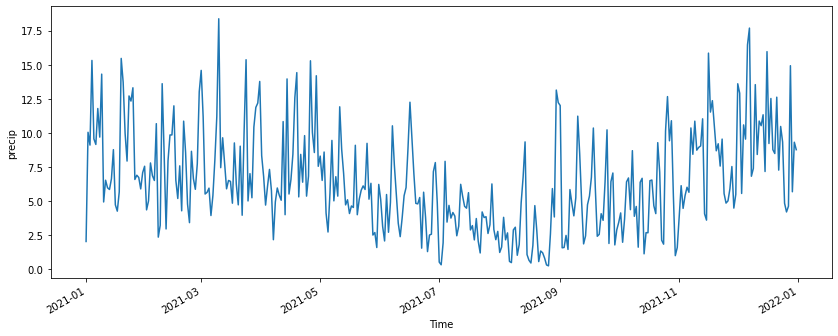

In [ ]:
ds_recorte.precip.mean(dim=['lat', 'lon']).plot(figsize=(14, 5))

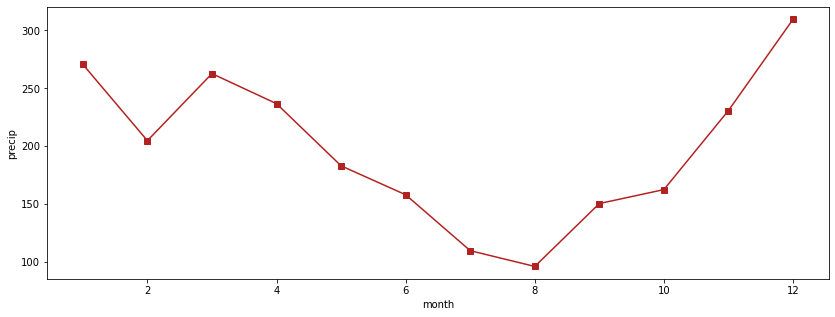

In [ ]:
ds_mensal.precip.mean(dim=['lat', 'lon']).plot(
    figsize=(14, 5), marker='s', color='firebrick')

<AxesSubplot:xlabel='month'>

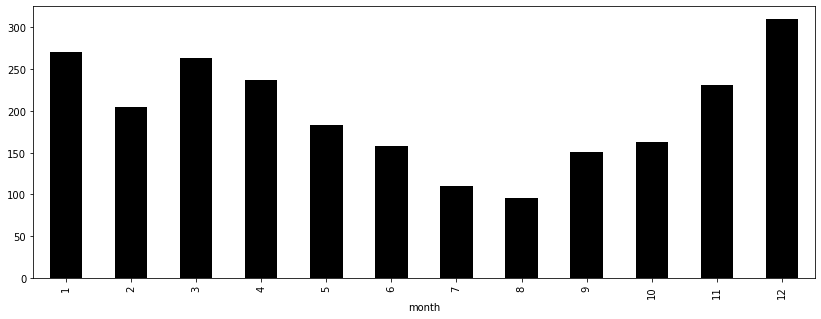

In [ ]:
ds_mensal.precip.mean(dim=['lat','lon']).to_series().plot.bar(figsize=(14,5), color='k')

Text(0.5, 0, 'Precipitation')

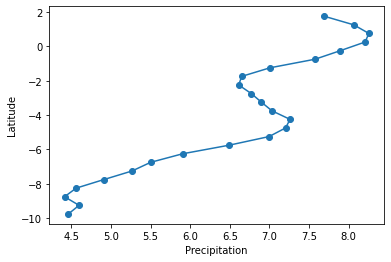

In [ ]:
# Plot zonal
series_zonal = ds_recorte.precip.mean(
    dim=['lon', 'time']).to_dataframe().reset_index()
series_zonal
plt.plot(series_zonal['precip'], series_zonal['lat'], marker='o')
plt.ylabel('Latitude')
plt.xlabel('Precipitation')

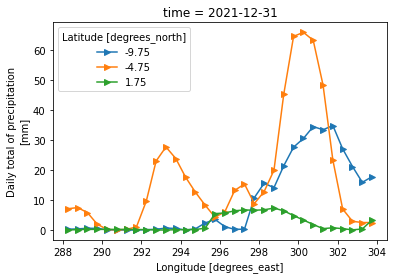

In [ ]:
# Com varios pontos definidos
ds_recorte.precip.isel(time=-1).sel(lat=[-10, -5, 2], method="nearest").plot(
    x="lon", hue="lat", marker='>')

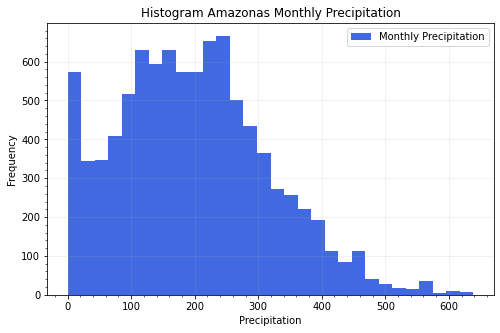

In [ ]:
# Histograma
fig, ax = plt.subplots(figsize=(8, 5))
ds_mensal.precip.plot(bins=30, color='royalblue', ax=ax,
                      label='Monthly Precipitation')
ax.grid(alpha=0.2)
ax.minorticks_on()
ax.set_ylabel('Frequency')
ax.set_xlabel('Precipitation')
ax.set_title('Histogram Amazonas Monthly Precipitation')
ax.legend()

### Aplicando médias ponderadas

* Vamos utilizar o conjunto de dados de temperatura máxima do CPC para calcular a média ponderada da área sobre seu domínio. Este conjunto de dados tem uma grade regular de latitude/longitude, portanto, a área da célula da grade diminui em direção ao pólo. Para esta grade podemos usar o cosseno da latitude como ajuste para a área da célula da grade.

Entao.

In [ ]:
ds_tmax = xr.open_dataset('tmax.2021.nc')

In [ ]:
# Criar pesos
weights = np.cos(np.deg2rad(ds_tmax.lat))
weights.name = 'weights'
# weights

In [ ]:
# Aplicar a matriz de pesos ao dataset
temp_weight = ds_tmax.tmax.weighted(weights) # Utilizando a função .weighted do xarray para inserir os pesos
# Calcula  a média ponderada utilzando os pesos
weighted_mean = temp_weight.mean(dim=("lon", "lat"))

* **Comparando as médias**

Text(0.5, 1.0, 'Global Mean Max Temperature - Land')

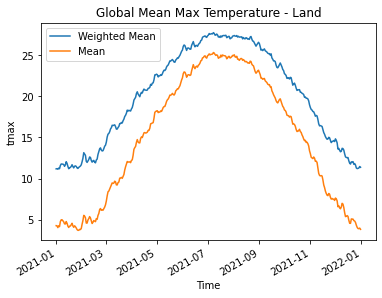

In [ ]:
# Plot
weighted_mean.plot(label="Weighted Mean")
ds_tmax.tmax.mean(dim=("lon", "lat")).plot(label="Mean")

plt.legend()
plt.title('Global Mean Max Temperature - Land')

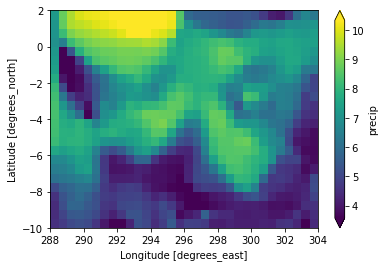

In [ ]:
# Plot espacial
ds_recorte.precip.mean(dim='time').plot(robust=True)

In [ ]:
ds_mensal

<xarray.Dataset>
Dimensions:  (lat: 24, lon: 32, month: 12)
Coordinates:
  * lat      (lat) float32 1.75 1.25 0.75 0.25 -0.25 ... -8.25 -8.75 -9.25 -9.75
  * lon      (lon) float32 288.2 288.8 289.2 289.8 ... 302.2 302.8 303.2 303.8
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    precip   (month, lat, lon) float32 119.7 204.2 315.1 ... 340.5 260.1 318.2

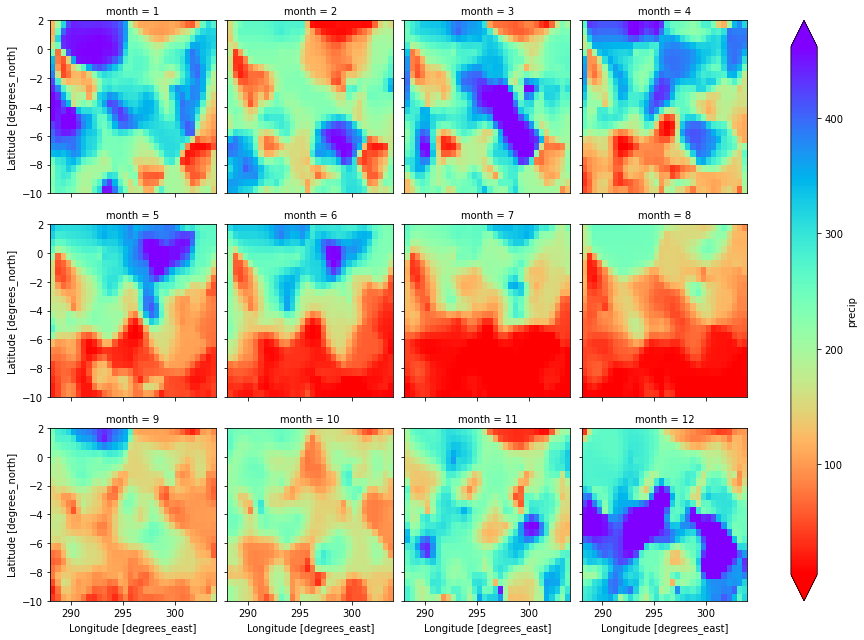

In [ ]:
# Plot espacial dos meses
ds_mensal.precip.plot(col='month',
                      col_wrap=4,
                      robust=True,
                      cmap='rainbow_r',
                      label=False)

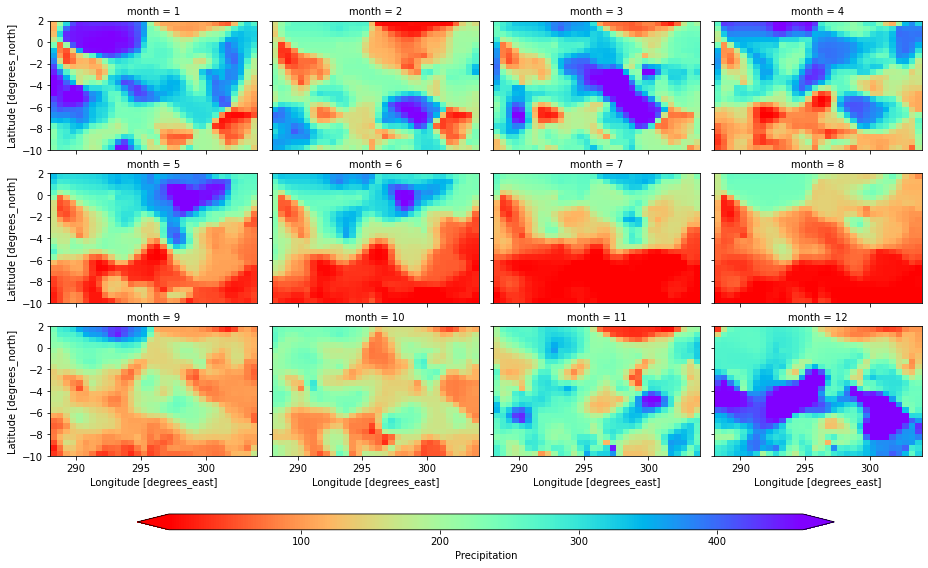

In [ ]:
# Plot espacial dos meses utilizando mais customizaçao
ds_mensal.precip.plot(col='month',
                      col_wrap=4,
                      robust=True,
                      cmap='rainbow_r',
                      cbar_kwargs={             ### Configuraçoes da barra de cores (colorbar)
                          "orientation": "horizontal",
                          "shrink": 0.8,
                          "aspect": 40,
                          "pad": 0.1,
                          "label": 'Precipitation'
                      },
                      )

### **Expressões `LAMBDA`**

No Python, uma função anônima significa que uma função não tem nome.

A palavra-chave **def** é usada para definir uma função normal em Python. 

Da mesma maneira, a palavra-chave **``lambda``** é utilizada para definir uma função anônima em Python.



* Essa função pode ter qualquer número de argumentos, mas apenas uma expressão, que é avaliada e retornada.

* Um é livre para usar funções lambda sempre que os objetos de função são necessários.

* Você precisa estar ciente de que as funções lambda são sintaticamente restritas a uma única expressão.

* Ele tem vários usos em campos específicos de programação, além de outros tipos de expressões em funções.

In [ ]:
## As duas funções abaixo são equivalentes
z = lambda x: x + 1

def soma_1(x):
    return x + 1

In [ ]:
z(7)

8

In [ ]:
# Chamar a função
print(z(5))
print(soma_1(5))

6
6


* **Outro exemplo de função lambda**

In [ ]:
soma = lambda x,y: x+y
soma(10, 15)

25

#### Aplicar mais parametros de personalizaçao

* **Vamos importar uma biblioteca que nos fornece novas paletas de cores**

In [ ]:
import cmocean.cm as cm

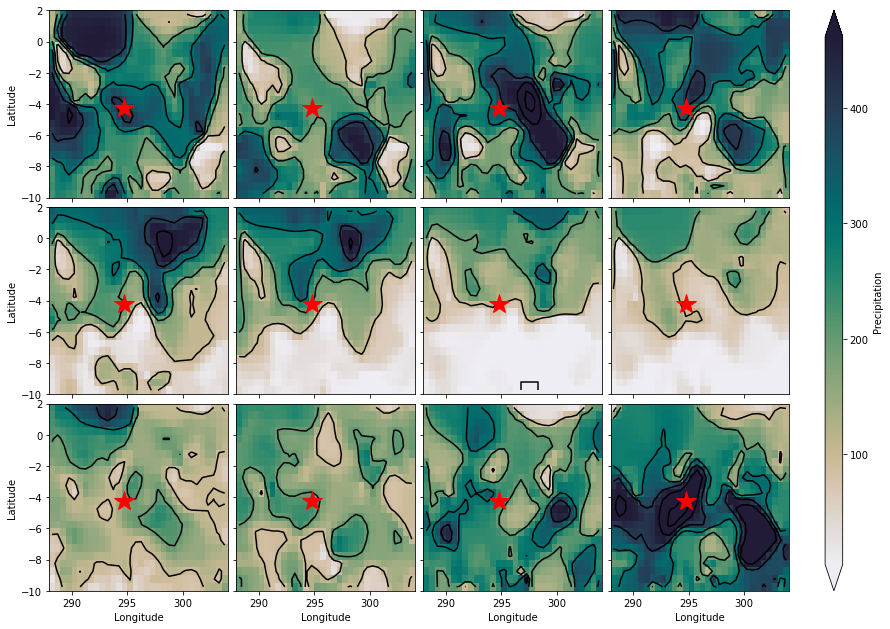

In [ ]:
fg = ds_mensal.precip.plot(col="month",
                           col_wrap=4,
                           robust=True,
                           cmap=cm.rain,
                           cbar_kwargs={
                               "orientation": "vertical",
                               "aspect": 30,
                               "pad": 0.1,
                               "label": 'Precipitation'
                           })

fg.set_xlabels('Longitude')
fg.set_ylabels('Latitude')
fg.set_titles('')

# Adicionar um plot de contorno. Podendo definir niveis
fg.map_dataarray(
    xr.plot.contour, x="lon", y="lat", colors="black", levels=8, add_colorbar=False)

# Modificar os espaçamento entre os graficos
fg.map(lambda: plt.subplots_adjust(
    hspace=0.05, wspace=0.05, left=0.02, right=0.81))

# PLotar um ponto nas figuras.
fg.map(lambda: plt.plot(lon, lat, markersize=20, marker="*", color="red"))

## Visualização estatistica com o Seaborn

In [ ]:
import seaborn as sns
import pandas as pd

* **Extraindo dados para humaita**

<AxesSubplot:xlabel='month', ylabel='precip'>

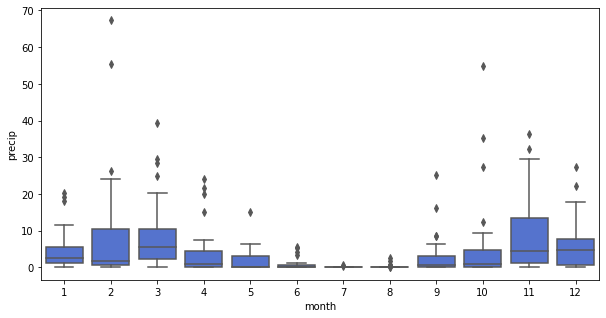

In [ ]:
data_humaita = (ds_recorte
                .sel(lat=-7.51, lon=360-63.07, method='nearest')
                .to_dataframe()
                .reset_index().assign(month=lambda x: x.time.dt.month)) # x.time.dt.month_name()



# data_humaita['month'] = data_humaita.time.dt.month
data_humaita
plt.figure(figsize=(10, 5))
sns.boxplot(x='month', y='precip', data=data_humaita, color='royalblue')

* **Extraindo dados para humaita e manicoré**

In [ ]:
lats = [-7.552500, -5.788611]
lons = [360-63.071389, 360-61.2883332]
regions = ['Humaitá', 'Manicoré']
dataframe = [] # lista vazia

### Loop para criar dataframe com mais de um ponto de dados
for lat, lon, region in zip(lats, lons, regions):
    data_regions = (ds_recorte
                    .sel(lat=lat, lon=lon, method='nearest')
                    .to_dataframe()
                    .reset_index())  #.assign(month=lambda x: x.time.dt.month)
    data_regions['Location'] = region
    data_regions['month'] = data_regions.time.dt.month
    dataframe.append(data_regions)

In [ ]:
# Concatenar o dataframe
df = pd.concat(dataframe, axis=0)
df

,time,lat,lon,precip,Location,month
0,2021-01-01,-7.75,296.75,0.000000,Humaitá,1
1,2021-01-02,-7.75,296.75,10.833922,Humaitá,1
2,2021-01-03,-7.75,296.75,8.518608,Humaitá,1
3,2021-01-04,-7.75,296.75,1.583553,Humaitá,1
4,2021-01-05,-7.75,296.75,2.500352,Humaitá,1
...,...,...,...,...,...,...
360,2021-12-27,-5.75,298.75,5.995007,Manicoré,12
361,2021-12-28,-5.75,298.75,0.124959,Manicoré,12
362,2021-12-29,-5.75,298.75,0.000000,Manicoré,12
363,2021-12-30,-5.75,298.75,10.981326,Manicoré,12


Text(0.5, 1.0, 'Precipitation - South Mesoregion Amazon')

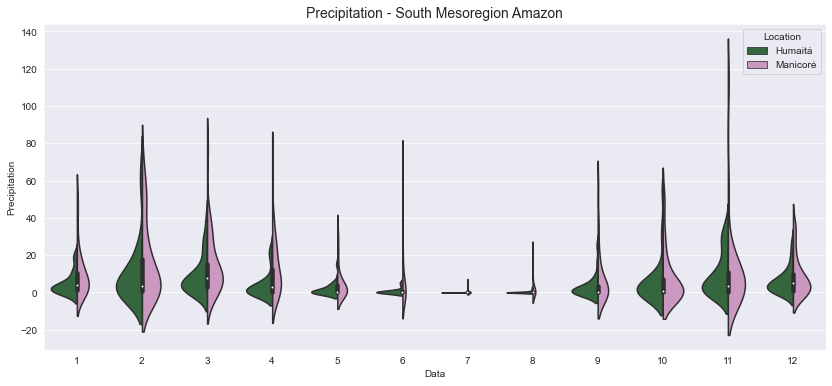

In [ ]:
# Plot 
sns.set_style('darkgrid')
plt.figure(figsize=(14, 6))
sns.violinplot(x='month', y='precip', hue='Location', data=df, split=True, palette='cubehelix')
plt.ylabel('Precipitation')
plt.xlabel('Data')
plt.title('Precipitation - South Mesoregion Amazon', fontsize=14)

Text(0.5, 1.0, 'Precipitation - South Mesoregion Amazon')

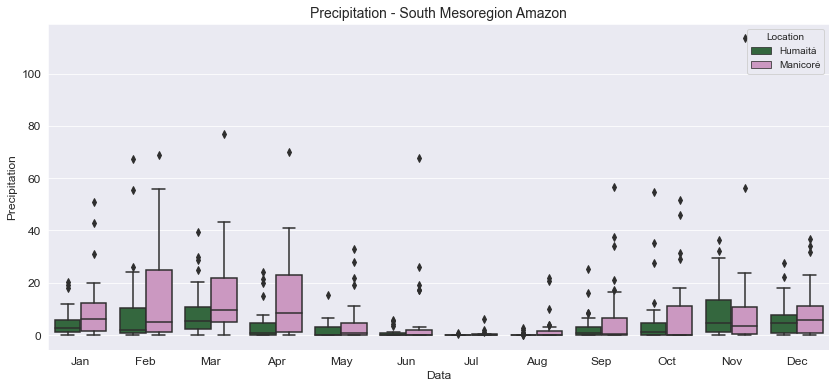

In [ ]:
# Plot 
sns.set_style('darkgrid') # Definindo o estilo do layout do plot

# Criando uma lista com o nome dos meses
mes = ['Jan', 'Feb', 'Mar', 'Apr', 
 'May', 'Jun', 'Jul', 'Aug', 
 'Sep', 'Oct', 'Nov', 'Dec']


# Plot do boxplot 
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(x='month', y='precip', hue='Location', data=df, palette='cubehelix', ax=ax)
ax.set_ylabel('Precipitation', fontsize=12)
ax.set_xlabel('Data', fontsize=12)
ax.set_xticklabels(mes)
ax.tick_params(labelsize=12)
ax.set_title('Precipitation - South Mesoregion Amazon', fontsize=14)

In [ ]:
# Calcular a precipitaçao mensal
df_group = df.groupby('Location')
hm = df_group.get_group('Humaitá').groupby('month').precip.sum()
mn = df_group.get_group('Manicoré').groupby('month').precip.sum()

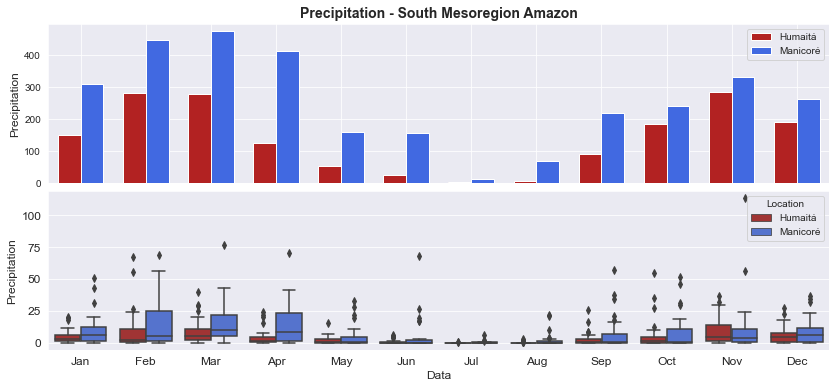

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize=(14, 6), nrows=2,
                               sharex=True, gridspec_kw={'hspace': 0.05})
index = np.arange(0, 11+1)
width = 0.35
ax1.bar(index - width/2, hm, width=width, color='firebrick', label='Humaitá')
ax1.bar(index + width/2, mn, width=width, color='royalblue', label='Manicoré')
ax1.set_ylabel('Precipitation', fontsize=12)
ax1.set_title('Precipitation - South Mesoregion Amazon',
              fontsize=14, fontweight='bold')
sns.boxplot(x='month', y='precip', hue='Location',
            data=df, palette=['firebrick', 'royalblue'], ax=ax2)
ax2.set_ylabel('Precipitation', fontsize=12)
ax2.set_xlabel('Data', fontsize=12)
ax2.set_xticklabels(mes)
ax2.tick_params(labelsize=12)

# Legenda
ax1.legend()

# fig.savefig('Plot_Humaita-Manicore.png', dpi=300, bbox_inches='tight', facecolor='white')